# Boat License Quiz Data Analysis

This notebook analyzes the questions.json file that contains boat license quiz questions. We'll perform various analyses to understand the structure and content of the quiz, including:

1. Loading and exploring the data structure
2. Counting the total number of questions
3. Analyzing the distribution of correct answers
4. Checking the number of options per question
5. Finding missing or duplicate question numbers
6. Displaying sample questions

Let's begin by importing the necessary libraries.

In [1]:
# Import required libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter

# Set plot styles
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Display all dataframe columns
pd.set_option('display.max_columns', None)

## 1. Load and Inspect the JSON Data

First, let's load the questions.json file and examine its structure.

In [2]:
# Load the questions from the JSON file
with open('questions_with_answers.json', 'r', encoding='utf-8') as f:
    questions = json.load(f)

# Display the first question to understand the structure
print(f"Data type: {type(questions)}")
print(f"Number of items: {len(questions)}")
print("\nExample of a question entry:")
print(json.dumps(questions[0], indent=2, ensure_ascii=False))

Data type: <class 'list'>
Number of items: 150

Example of a question entry:
{
  "question_number": "1",
  "question": "Γεωγραφικές συντεταγμένες ενός σημείου είναι:",
  "options": {
    "a": "Το γεωγραφικό στίγμα του σκάφους σε χρονική στιγμή.",
    "b": "Το γεωγραφικό πλάτος F και το γεωγραφικό μήκος L.",
    "c": "Κανένα από τα παραπάνω."
  },
  "correct_answer": "b"
}


In [3]:
# Convert the questions to a pandas DataFrame for easier analysis
# First, extract the options to separate columns
questions_processed = []

for question in questions:
    q_dict = {
        'question_number': question['question_number'],
        'question': question['question'],
        'option_a': question['options'].get('a', None),
        'option_b': question['options'].get('b', None),
        'option_c': question['options'].get('c', None),
        'correct_answer': question['correct_answer']
    }
    questions_processed.append(q_dict)

# Create DataFrame
df = pd.DataFrame(questions_processed)

# Display DataFrame info and first few rows
print("DataFrame Information:")
print(df.info())
print("\nFirst few questions:")
df.head()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   question_number  150 non-null    object
 1   question         150 non-null    object
 2   option_a         150 non-null    object
 3   option_b         150 non-null    object
 4   option_c         150 non-null    object
 5   correct_answer   150 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB
None

First few questions:


,question_number,question,option_a,option_b,option_c,correct_answer
0,1,Γεωγραφικές συντεταγμένες ενός σημείου είναι:,Το γεωγραφικό στίγμα του σκάφους σε χρονική στ...,Το γεωγραφικό πλάτος F και το γεωγραφικό μήκος L.,Κανένα από τα παραπάνω.,b
1,2,Όταν ένα πλοίο πρέπει να διασχίσει λωρίδα θαλά...,Θα τη διασχίσει με γωνία 45 μοιρών.,Θα τη διασχίσει με ταχύτητα.,Θα τη διασχίσει σε ορθή γωνία (90 μοιρών).,c
2,3,Για την ασφαλή αγκυροβολία σε βάθος θάλασσας 5...,25 μέτρα έκταμα,20 μέτρα έκταμα,15 μέτρα έκταμα,a
3,4,Φανός κορώνης είναι:,Λευκό φανάρι στη μέση του πλοίου με 225 μοίρες...,Λευκό φανάρι στην πρύμνη 135 μοιρών και φωτίζε...,Λευκό φανάρι στην πρύμνη 135 μοιρών και φωτίζε...,c
4,5,Το μπούκωμα του κινητήρα (αργή κίνηση του σκάφ...,"Σε μπέρδεμα της προπέλας σε φύκια, σχοινιά κ.λ.π.",Σε μεγάλο κυματισμό.,Σε ελλιπή τροφοδοσία καυσίμων.,a


## 2. Count Total Number of Questions

Let's calculate the total number of questions in the dataset and check the question numbering.

In [4]:
# Count total number of questions
total_questions = len(df)
print(f"Total number of questions in the dataset: {total_questions}")

# Convert question_number to numeric for analysis
# Some numbers might be strings
df['question_number_numeric'] = pd.to_numeric(df['question_number'], errors='coerce')

# Calculate some basic statistics on question numbers
min_question = df['question_number_numeric'].min()
max_question = df['question_number_numeric'].max()

print(f"Minimum question number: {min_question}")
print(f"Maximum question number: {max_question}")
print(f"Expected number of questions (if sequential): {max_question - min_question + 1}")
print(f"Difference from actual count: {max_question - min_question + 1 - total_questions}")

Total number of questions in the dataset: 150
Minimum question number: 1
Maximum question number: 150
Expected number of questions (if sequential): 150
Difference from actual count: 0


## 3. Analyze Distribution of Correct Answers

Let's analyze how the correct answers are distributed among options a, b, and c. This can help identify if there's any bias towards a specific answer.

Frequency of each correct answer:
correct_answer
a    44
b    45
c    61
Name: count, dtype: int64

Percentage distribution of correct answers:
Option a: 29.33%
Option b: 30.0%
Option c: 40.67%


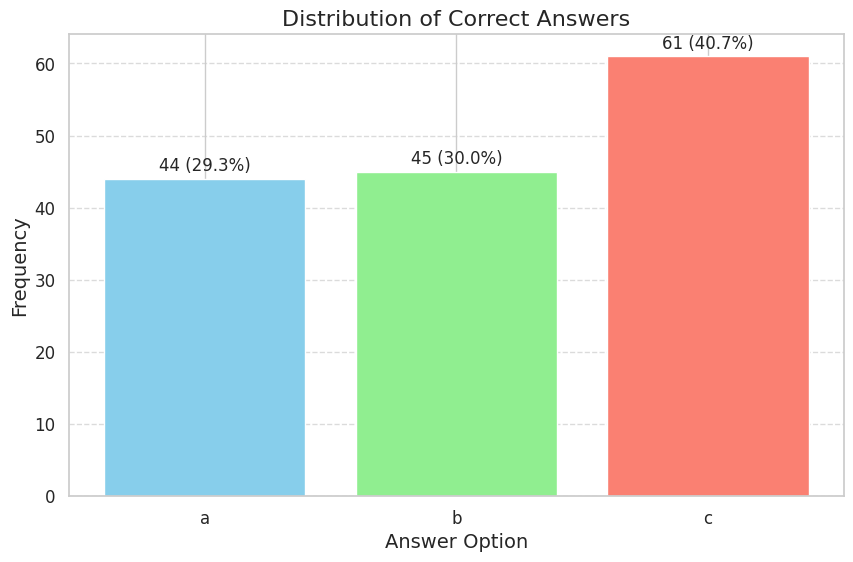


Chi-square test for uniform distribution:
Chi2 statistic: 3.64
p-value: 0.1620
The distribution of correct answers does not significantly differ from uniform (p ≥ 0.05)


In [5]:
# Count the frequency of each correct answer
correct_answer_counts = df['correct_answer'].value_counts().sort_index()
print("Frequency of each correct answer:")
print(correct_answer_counts)

# Calculate percentages
correct_answer_percentages = (correct_answer_counts / total_questions * 100).round(2)
print("\nPercentage distribution of correct answers:")
for answer, percentage in correct_answer_percentages.items():
    print(f"Option {answer}: {percentage}%")

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(correct_answer_counts.index, correct_answer_counts.values, color=['skyblue', 'lightgreen', 'salmon'])

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height} ({height/total_questions*100:.1f}%)',
             ha='center', va='bottom')

plt.title('Distribution of Correct Answers', fontsize=16)
plt.xlabel('Answer Option', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Check if there's significant bias using chi-square test
from scipy.stats import chisquare
expected = np.array([total_questions/3, total_questions/3, total_questions/3])  # Expected uniform distribution
observed = correct_answer_counts.values
chi2, p_value = chisquare(observed, expected)

print(f"\nChi-square test for uniform distribution:")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("The distribution of correct answers is significantly different from uniform (p < 0.05)")
    # Find which option is overrepresented
    most_common = correct_answer_counts.idxmax()
    print(f"Option '{most_common}' appears more frequently as the correct answer.")
else:
    print("The distribution of correct answers does not significantly differ from uniform (p ≥ 0.05)")

## 4. Count Number of Options per Question

Let's verify that all questions have the same number of options and identify any that have missing options.

Number of questions with each option count:
num_options
3    150
Name: count, dtype: int64


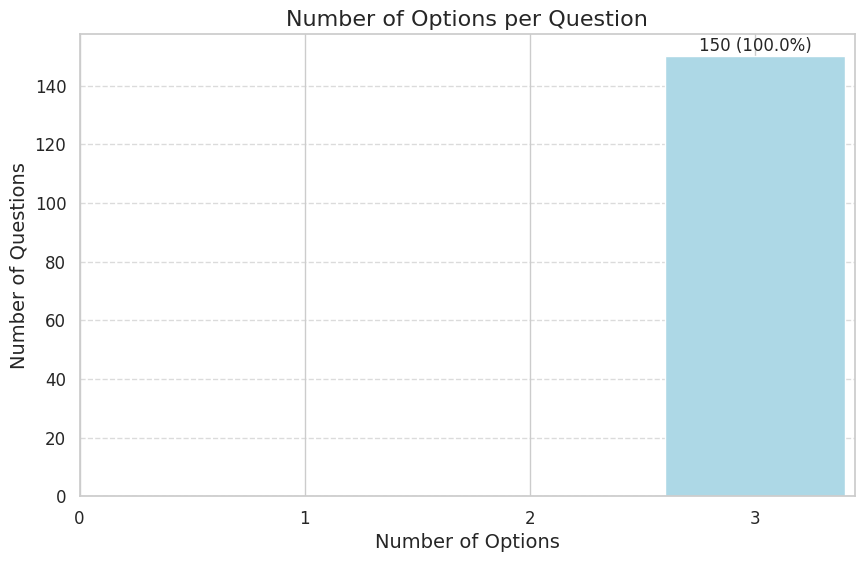


All questions have 3 options.

All questions have options a, b, and c.


In [6]:
# Check number of options per question
df['num_options'] = df.apply(lambda row: sum(1 for opt in ['option_a', 'option_b', 'option_c'] if pd.notna(row[opt])), axis=1)

# Display distribution of number of options
options_counts = df['num_options'].value_counts().sort_index()
print("Number of questions with each option count:")
print(options_counts)

# Create a bar chart to visualize options per question
plt.figure(figsize=(10, 6))
bars = plt.bar(options_counts.index, options_counts.values, color='lightblue')

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height} ({height/total_questions*100:.1f}%)',
             ha='center', va='bottom')

plt.title('Number of Options per Question', fontsize=16)
plt.xlabel('Number of Options', fontsize=14)
plt.ylabel('Number of Questions', fontsize=14)
plt.xticks(range(0, 4), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Find questions with fewer than 3 options
if len(df[df['num_options'] < 3]) > 0:
    print("\nQuestions with fewer than 3 options:")
    display(df[df['num_options'] < 3][['question_number', 'question', 'num_options']])
else:
    print("\nAll questions have 3 options.")

# Verify that all questions have options a, b, and c
missing_options = []
for opt in ['option_a', 'option_b', 'option_c']:
    missing = df[df[opt].isna()]
    if len(missing) > 0:
        missing_options.append((opt, len(missing)))

if missing_options:
    print("\nMissing options detected:")
    for opt, count in missing_options:
        print(f"{count} questions missing {opt}")
else:
    print("\nAll questions have options a, b, and c.")

## 5. Find Questions with Missing or Duplicate Numbers

Let's check for any gaps or duplicates in the question numbering sequence.

No duplicate question numbers found.

No missing question numbers in the sequence.


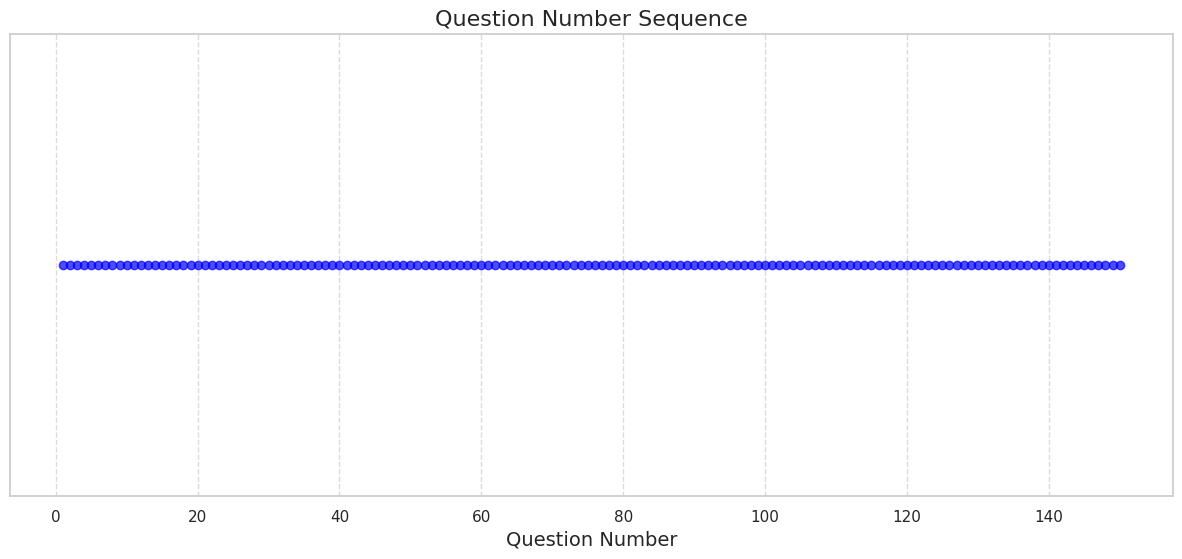

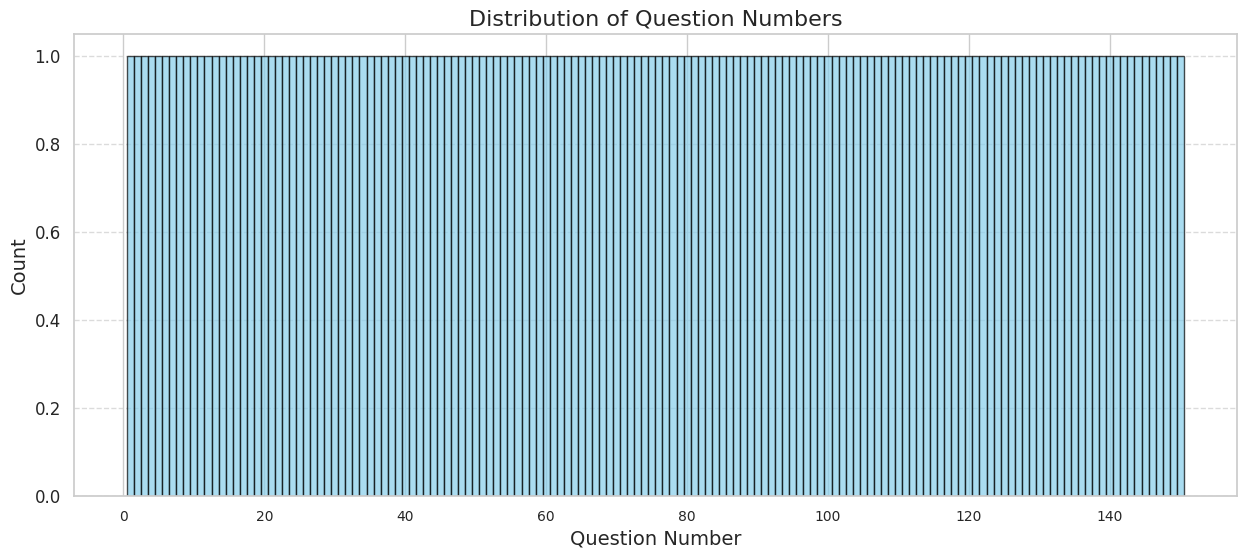

In [7]:
# Check for duplicate question numbers
duplicate_numbers = df[df.duplicated('question_number', keep=False)].sort_values('question_number')
if len(duplicate_numbers) > 0:
    print("Duplicate question numbers found:")
    display(duplicate_numbers[['question_number', 'question']])
else:
    print("No duplicate question numbers found.")

# Check for missing question numbers in the sequence
all_numbers = set(df['question_number_numeric'].dropna())
expected_range = set(range(int(min_question), int(max_question) + 1))
missing_numbers = expected_range - all_numbers

if missing_numbers:
    print(f"\nMissing question numbers: {sorted(missing_numbers)}")
    print(f"Total missing: {len(missing_numbers)}")
else:
    print("\nNo missing question numbers in the sequence.")

# Visualize the question number sequence
plt.figure(figsize=(15, 6))
plt.scatter(df['question_number_numeric'], np.ones(len(df)), color='blue', alpha=0.7)
plt.title('Question Number Sequence', fontsize=16)
plt.xlabel('Question Number', fontsize=14)
plt.yticks([])  # Hide y-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Highlight missing numbers if any
if missing_numbers:
    plt.scatter(list(missing_numbers), np.ones(len(missing_numbers)), color='red', marker='x', s=100, label='Missing')
    plt.legend()

plt.show()

# Visualize distribution of question numbers
plt.figure(figsize=(15, 6))
plt.hist(df['question_number_numeric'], bins=int(max_question - min_question + 1), 
         range=(min_question-0.5, max_question+0.5), alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Question Numbers', fontsize=16)
plt.xlabel('Question Number', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 6. Display Sample Questions

Let's randomly select and display a few sample questions to get a better feel for the content.

In [8]:
# Function to display a formatted question
def display_question(q):
    print(f"Question {q['question_number']}: {q['question']}")
    print(f"A. {q['option_a']}")
    print(f"B. {q['option_b']}")
    print(f"C. {q['option_c']}")
    print(f"Correct Answer: {q['correct_answer'].upper()}")
    print("-" * 80)

# Randomly select 5 questions to display
sample_size = min(5, len(df))
sample_indices = random.sample(range(len(df)), sample_size)
print(f"Displaying {sample_size} randomly selected questions:\n")

for idx in sample_indices:
    display_question(df.iloc[idx])

Displaying 5 randomly selected questions:

Question 96: Γεωγραφικό στίγμα είναι:
A. Η απόσταση που είναι το σκάφος από το λιμάνι.
B. Η πορεία που ακολουθεί ένα πλοίο.
C. Το σημείο πάνω στο Ναυτικό Χάρτη που βρίσκεται το σκάφος σε δεδομένη χρονική στιγμή.
Correct Answer: C
--------------------------------------------------------------------------------
Question 115: Όταν ο φάρος εκπέμπει κόκκινο φως:
A. Η περιοχή χαρακτηρίζεται ως επικίνδυνη.
B. Η περιοχή χαρακτηρίζεται ως ακίνδυνη.
C. Η περιοχή έχει ρεύματα.
Correct Answer: A
--------------------------------------------------------------------------------
Question 3: Για την ασφαλή αγκυροβολία σε βάθος θάλασσας 5 μέτρων χρειάζονται:
A. 25 μέτρα έκταμα
B. 20 μέτρα έκταμα
C. 15 μέτρα έκταμα
Correct Answer: A
--------------------------------------------------------------------------------
Question 41: Πλευρικοί φανοί ενός πλοίου είναι:
A. Ένα πράσινο στην αριστερή και ένα κόκκινο στη δεξιά πλευρά του πλοίου που φωτίζουν τόξο 112,5 μοίρες.

## 7. Additional Analysis: Question and Option Lengths

Let's analyze the length of questions and options to understand the complexity of the quiz.

Statistics on lengths of questions and options:


,question_length,option_a_length,option_b_length,option_c_length
count,150.000000,150.000000,150.000000,150.000000
mean,53.806667,48.706667,50.440000,49.346667
std,27.664747,40.554305,43.558413,36.893823
min,12.000000,8.000000,5.000000,6.000000
25%,33.000000,26.000000,25.000000,22.000000
50%,49.000000,40.000000,39.000000,39.000000
75%,68.500000,59.500000,59.000000,63.000000
max,181.000000,359.000000,359.000000,176.000000


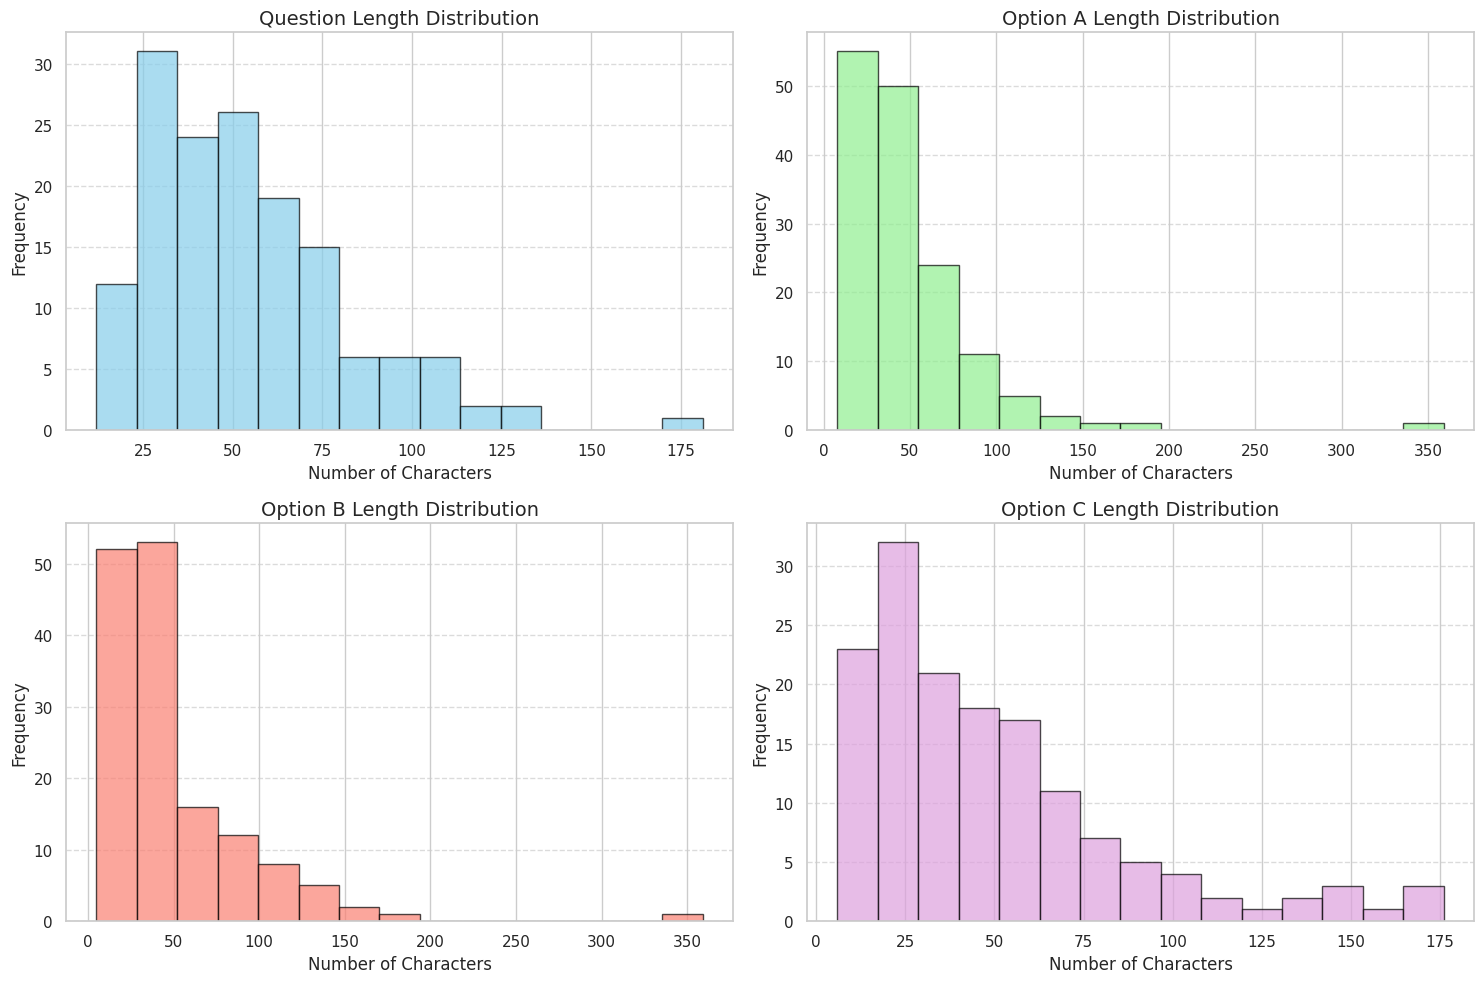


Average length of correct answer options: 62.44
Average length of incorrect answer options: 43.026666666666664

t-test results: t=4.27, p=0.0000
There is a significant difference in length between correct and incorrect options.


In [9]:
# Calculate lengths of questions and options
df['question_length'] = df['question'].str.len()
df['option_a_length'] = df['option_a'].str.len()
df['option_b_length'] = df['option_b'].str.len()
df['option_c_length'] = df['option_c'].str.len()

# Get statistics on lengths
length_stats = df[['question_length', 'option_a_length', 'option_b_length', 'option_c_length']].describe()
print("Statistics on lengths of questions and options:")
display(length_stats)

# Create histograms for question lengths
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(df['question_length'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Question Length Distribution', fontsize=14)
plt.xlabel('Number of Characters', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 2)
plt.hist(df['option_a_length'], bins=15, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Option A Length Distribution', fontsize=14)
plt.xlabel('Number of Characters', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 3)
plt.hist(df['option_b_length'], bins=15, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Option B Length Distribution', fontsize=14)
plt.xlabel('Number of Characters', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 4)
plt.hist(df['option_c_length'], bins=15, color='plum', edgecolor='black', alpha=0.7)
plt.title('Option C Length Distribution', fontsize=14)
plt.xlabel('Number of Characters', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Compare average length of correct answer options vs incorrect ones
df['correct_option_length'] = df.apply(
    lambda row: row[f'option_{row["correct_answer"]}_length'] 
    if row["correct_answer"] in ['a', 'b', 'c'] else None, 
    axis=1
)

# Calculate average length of incorrect options
option_cols = ['option_a_length', 'option_b_length', 'option_c_length']
for i, row in df.iterrows():
    correct = row['correct_answer']
    if correct in ['a', 'b', 'c']:
        incorrect_lengths = [row[col] for col in option_cols if col != f'option_{correct}_length']
        df.at[i, 'avg_incorrect_length'] = sum(incorrect_lengths) / len(incorrect_lengths)

# Compare lengths
print("\nAverage length of correct answer options:", df['correct_option_length'].mean())
print("Average length of incorrect answer options:", df['avg_incorrect_length'].mean())

# Test if there's a significant difference
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(
    df['correct_option_length'].dropna(), 
    df['avg_incorrect_length'].dropna()
)
print(f"\nt-test results: t={t_stat:.2f}, p={p_val:.4f}")
if p_val < 0.05:
    print("There is a significant difference in length between correct and incorrect options.")
else:
    print("There is no significant difference in length between correct and incorrect options.")

## 8. Word Frequency Analysis

Let's analyze the most common words in questions and options to understand the key topics of the quiz.

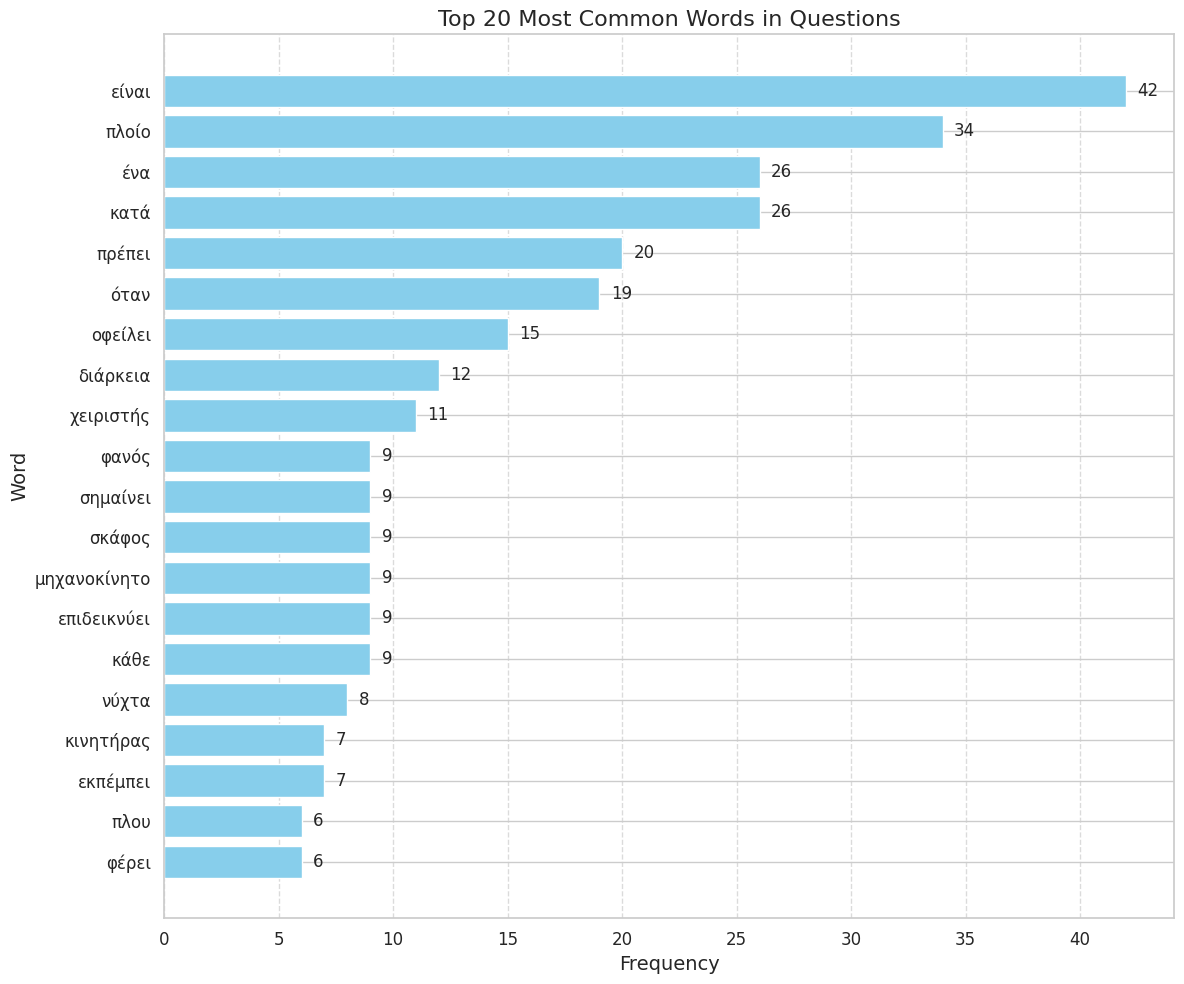

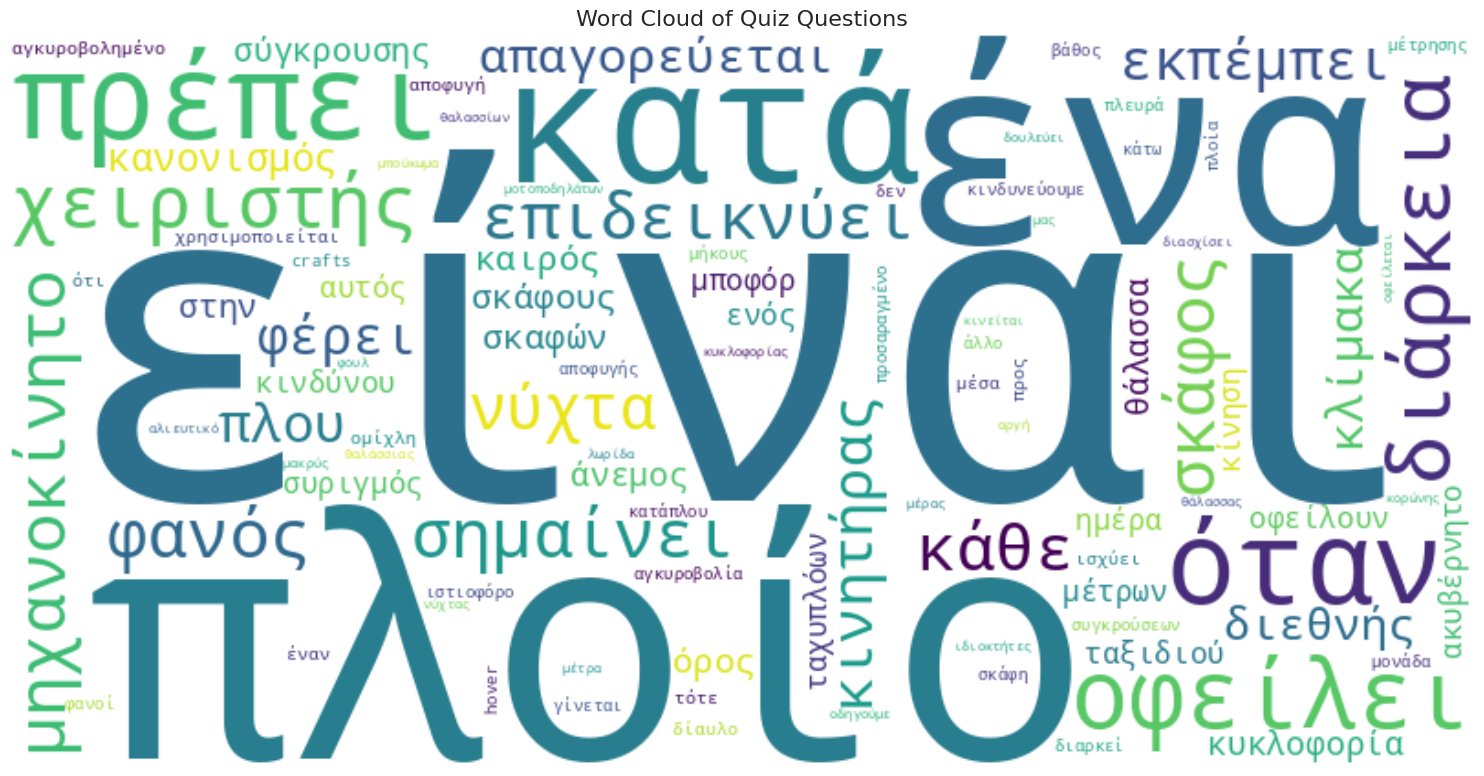

In [10]:
# Function to clean and extract words from text
def extract_words(text):
    import re
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', ' ', text.lower())
    # Split into words
    words = text.split()
    # Filter out stopwords and short words
    stopwords = ['το', 'τα', 'του', 'της', 'των', 'και', 'με', 'σε', 'από', 'για', 'που', 'τον', 'την', 'στο', 'στη']
    words = [word for word in words if word not in stopwords and len(word) > 2]
    return words

# Combine all questions into a single text
all_questions_text = ' '.join(df['question'].tolist())
question_words = extract_words(all_questions_text)

# Count word frequencies
word_counts = Counter(question_words)
most_common_words = word_counts.most_common(20)

# Create dataframe for plotting
words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Create horizontal bar chart
plt.figure(figsize=(12, 10))
bars = plt.barh(words_df['word'], words_df['count'], color='skyblue')

# Add count labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{width}', ha='left', va='center')

plt.title('Top 20 Most Common Words in Questions', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # To display the most common words at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a word cloud (if wordcloud package is available)
try:
    from wordcloud import WordCloud
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          max_words=100, contour_width=3, contour_color='steelblue')
    
    # Generate from frequency dictionary
    wordcloud.generate_from_frequencies(word_counts)
    
    # Display the word cloud
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Quiz Questions', fontsize=16)
    plt.tight_layout()
    plt.show()
except ImportError:
    print("WordCloud package not available. Install with: pip install wordcloud")

## 9. Conclusion and Summary

Let's summarize our findings about the boat license quiz questions.

In [11]:
# Generate summary statistics for the dataset
summary = {
    "Total Questions": len(df),
    "Min Question Number": df['question_number_numeric'].min(),
    "Max Question Number": df['question_number_numeric'].max(),
    "Missing Question Numbers": len(expected_range - all_numbers),
    "Duplicate Question Numbers": len(duplicate_numbers),
    "Questions with 3 Options": len(df[df['num_options'] == 3]),
    "Questions with Fewer Options": len(df[df['num_options'] < 3]),
    "Most Common Correct Answer": df['correct_answer'].value_counts().idxmax(),
    "Avg Question Length (chars)": df['question_length'].mean(),
    "Avg Option Length (chars)": (df['option_a_length'].mean() + df['option_b_length'].mean() + df['option_c_length'].mean()) / 3
}

# Display summary as a dataframe
summary_df = pd.DataFrame(list(summary.items()), columns=['Metric', 'Value'])
display(summary_df)

# Print textual conclusion
print("Key findings from the analysis of the boat license quiz questions:")
print(f"1. The dataset contains {summary['Total Questions']} questions numbered from {summary['Min Question Number']} to {summary['Max Question Number']}.")

if summary['Missing Question Numbers'] > 0:
    print(f"2. There are {summary['Missing Question Numbers']} missing question numbers in the sequence.")
else:
    print("2. The question numbering sequence is complete with no missing numbers.")

if summary['Duplicate Question Numbers'] > 0:
    print(f"3. There are {summary['Duplicate Question Numbers']} duplicate question numbers.")
else:
    print("3. There are no duplicate question numbers.")

print(f"4. {summary['Questions with 3 Options']} questions have all 3 options (a, b, c).")

if summary['Questions with Fewer Options'] > 0:
    print(f"5. {summary['Questions with Fewer Options']} questions have fewer than 3 options.")
else:
    print("5. All questions have the expected 3 options.")

print(f"6. The most common correct answer is option '{summary['Most Common Correct Answer']}'.")
print(f"7. The average question length is {summary['Avg Question Length (chars)']:.1f} characters.")
print(f"8. The average option length is {summary['Avg Option Length (chars)']:.1f} characters.")

,Metric,Value
0,Total Questions,150
1,Min Question Number,1
2,Max Question Number,150
3,Missing Question Numbers,0
4,Duplicate Question Numbers,0
5,Questions with 3 Options,150
6,Questions with Fewer Options,0
7,Most Common Correct Answer,c
8,Avg Question Length (chars),53.806667
9,Avg Option Length (chars),49.497778


Key findings from the analysis of the boat license quiz questions:
1. The dataset contains 150 questions numbered from 1 to 150.
2. The question numbering sequence is complete with no missing numbers.
3. There are no duplicate question numbers.
4. 150 questions have all 3 options (a, b, c).
5. All questions have the expected 3 options.
6. The most common correct answer is option 'c'.
7. The average question length is 53.8 characters.
8. The average option length is 49.5 characters.
